## These are the final remarks on trading_volume

In [1]:
import pandas as pd
import numpy as np

# ---------- STEP 1: BASELINE INPUTS ----------
V_c2 = 43_000      # Consumer volume ($MM)
V_i2 = 194_000     # Institutional volume ($MM)
R_c2 = 650         # Consumer revenue ($MM)
R_i2 = 61          # Institutional revenue ($MM)

# Derived take rates
r_c2 = R_c2 / V_c2     # 0.01511
r_i2 = R_i2 / V_i2     # 0.000314

# ---------- STEP 2: MARKET DRIVERS ----------
G = 0.17          # Global spot volume growth QoQ
g_alt = 0.10      # Altcoin Index QoQ growth
g_maj = 0.08      # Majors (BTC+ETH+SOL)
g_cme = 0.06      # CME Futures OI QoQ growth

# ---------- STEP 3: ELASTICITIES ----------
a1, a2 = 0.6, 0.2      # consumer sensitivities
b1, b2, b3 = 0.5, 0.1, 0.3  # institutional sensitivities

# ---------- STEP 4: TAKE-RATE ADJUSTMENTS ----------
gamma = 0.2      # consumer sensitivity to altcoin trend
delta = 0.0      # institutional base shift
mix_c = 0.0
mix_i = 0.0

# ---------- STEP 5: Q3 VOLUMES ----------
V_c3 = V_c2 * (1 + G) * (1 + a1*g_alt + a2*g_maj)
V_i3 = V_i2 * (1 + G) * (1 + b1*g_maj + b2*g_alt + b3*g_cme)

# ---------- STEP 6: Q3 TAKE RATES ----------
r_c3 = r_c2 * (1 + gamma*g_alt + mix_c)
r_i3 = r_i2 * (1 + delta + mix_i)

# ---------- STEP 7: Q3 REVENUES ----------
R_c3 = V_c3 * r_c3
R_i3 = V_i3 * r_i3
core_tx_rev = R_c3 + R_i3

# ---------- STEP 8: DERIBIT CONSOLIDATION ----------
july_run_rate = 30.0  # $MM
days_consolidated = 48
days_in_month = 30
deribit_mult = 1.0

deribit_rev = july_run_rate * (days_consolidated / days_in_month) * deribit_mult
total_tx_rev = core_tx_rev + deribit_rev

# ---------- STEP 9: DISPLAY ----------
results = pd.DataFrame({
    "Metric": ["Consumer Volume", "Institutional Volume", 
                "Consumer Take Rate", "Institutional Take Rate",
                "Consumer Revenue", "Institutional Revenue",
                "Core Tx Revenue", "Deribit Revenue", "Total Tx Revenue"],
    "Value": [V_c3, V_i3, r_c3, r_i3, R_c3, R_i3, core_tx_rev, deribit_rev, total_tx_rev]
})

pd.options.display.float_format = '{:,.3f}'.format
print(results)


                    Metric       Value
0          Consumer Volume  54,133.560
1     Institutional Volume 242,414.640
2       Consumer Take Rate       0.015
3  Institutional Take Rate       0.000
4         Consumer Revenue     834.664
5    Institutional Revenue      76.223
6          Core Tx Revenue     910.887
7          Deribit Revenue      48.000
8         Total Tx Revenue     958.887


### Checking Month to Month to see if July trading was consistent with Aug and Sep

In [6]:
import pandas as pd

# If volume is already numeric, skip string replacement
df['snapped_at'] = pd.to_datetime(df['snapped_at'])

# If volume is NOT numeric, uncomment the next line:
# df['volume'] = df['volume'].astype(str).str.replace(',', '').astype(float)

# Extract month and aggregate
df['month'] = df['snapped_at'].dt.to_period('M')
monthly_volume = df.groupby('month')['volume'].sum().reset_index()
monthly_volume['month'] = monthly_volume['month'].dt.to_timestamp()

print(monthly_volume)


        month              volume
0  2024-09-01  10,342,743,007.865
1  2024-10-01  60,946,972,528.335
2  2024-11-01 173,516,776,714.570
3  2024-12-01 188,984,456,755.456
4  2025-01-01 152,465,609,158.171
5  2025-02-01 123,991,646,908.434
6  2025-03-01 102,238,802,299.527
7  2025-04-01  88,265,454,377.578
8  2025-05-01  84,685,715,581.806
9  2025-06-01  55,758,554,655.887
10 2025-07-01 102,539,564,234.431
11 2025-08-01  99,504,011,349.524
12 2025-09-01  65,575,970,258.096


/var/folders/tb/zk15pcq16yng7wq853lq67ph0000gn/T/ipykernel_58845/3464300765.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['snapped_at'].dt.to_period('M')


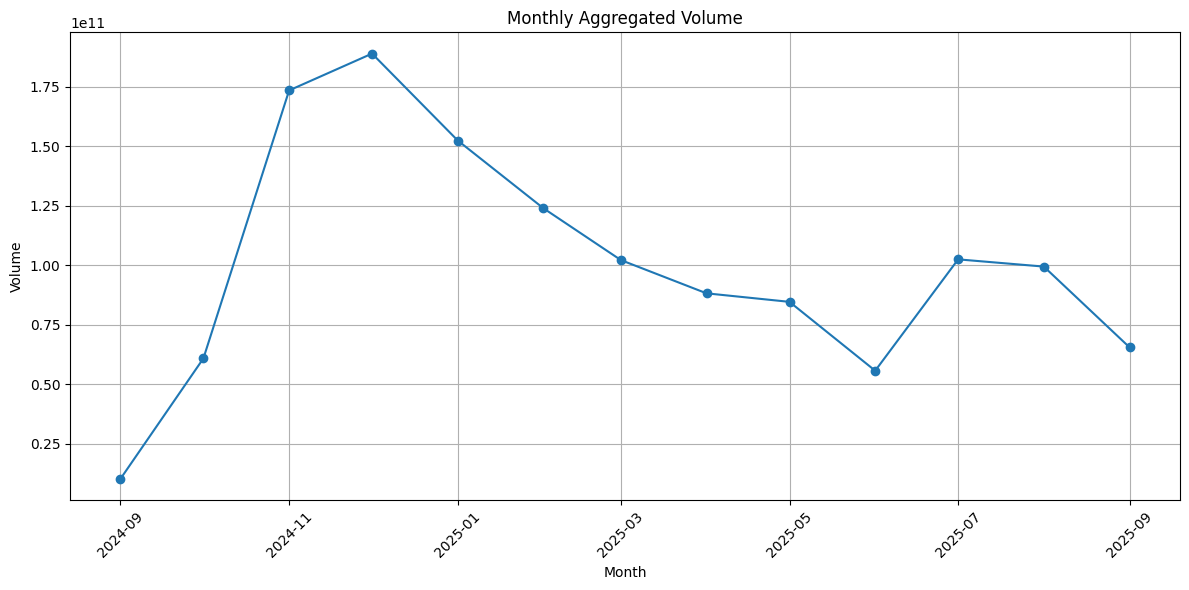

In [9]:
import matplotlib.pyplot as plt

# Assuming your aggregated DataFrame is named monthly_volume
plt.figure(figsize=(12, 6))
plt.plot(monthly_volume['month'], monthly_volume['volume'], marker='o', linestyle='-')

# Formatting
plt.title('Monthly Aggregated Volume')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Realized I am missing 6 days of q3, because I started before Sep was over 

In [11]:
full_q3_df = pd.read_csv("market_history_monthly_2025.csv")

In [15]:
full_q3_df["Market Participant"].unique()

array(['BYX Equities (Y)', 'BZX Equities (Z)', 'EDGA Equities (J)',
       'EDGX Equities (K)', 'FINRA / NYSE TRF (DN)',
       'FINRA / Nasdaq TRF Carteret (DQ)',
       'FINRA / Nasdaq TRF Chicago (DB)', 'Investors Exchange (V)',
       'LTSE (L)', 'MIAX Pearl (H)', 'Members Exchange (U)', 'NASDAQ (Q)',
       'NASDAQ BX (B)', 'NASDAQ PSX (X)', 'NYSE (N)', 'NYSE American (A)',
       'NYSE Arca (P)', 'NYSE National (C)', 'NYSE Texas (M)'],
      dtype=object)